## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Loading the dataset
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"
data = pd.read_csv(url)
raw_output_file = "Mall_Customers_Raw.csv"
data.to_csv(raw_output_file, index=False)
print(f"Raw data saved to {raw_output_file}")

Raw data saved to Mall_Customers_Raw.csv


In [3]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [4]:
# Data Preprocessing
# Encode 'Gender' column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


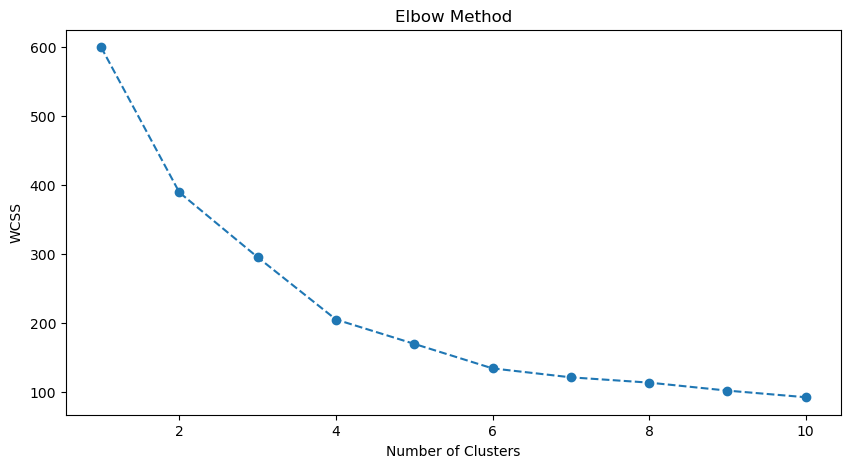

In [5]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# From the Elbow Method, choose the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Evaluation Metric: Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40846873777345605


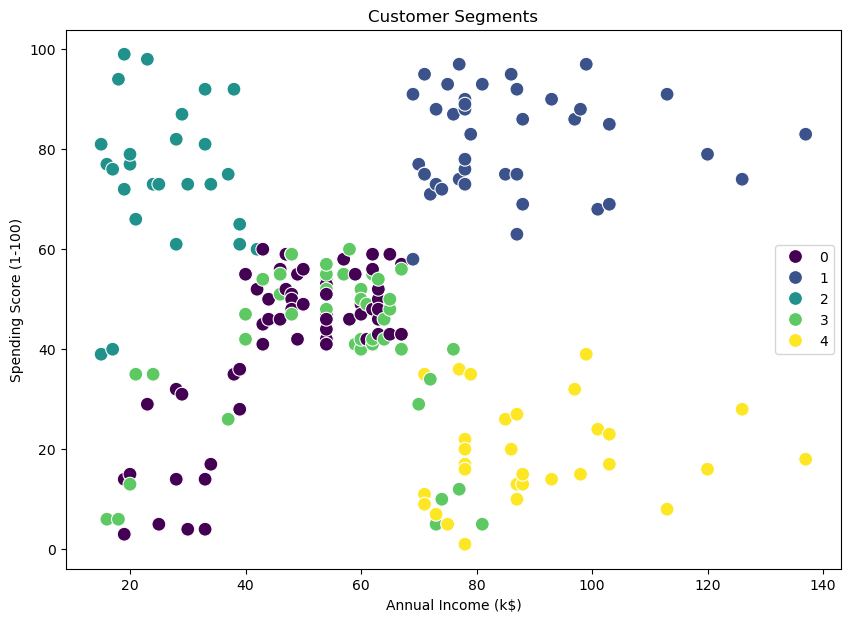

In [7]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusions and Future Improvement Suggestions:

  Distinct customer segments were idenfified based on age, annual income, and spending score.
## Insights 
We needtargeted marketing strategies for each segment to enhance customer engagement and sales.

## Future Improvements:
Incorporate additional features such as purchase history or customer loyalty data for more nuanced segmentation.
Experiment with other clustering algorithms (e.g., DBSCAN, Agglomerative Clustering) to compare performance.
Apply dimensionality reduction techniques like PCA for better visualization and understanding of clusters.